In [330]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [331]:
import scipy.io as sio

In [332]:
data = sio.loadmat('ex5data1.mat')

In [333]:
data

{'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-12.76686065],
        [ 34.05450539],
        [ 39.22350028],
        [  1.97449674],
        [ 29.6217551 ],
        [-23.66962971],
        [ -9.01180139],
        [-55.94057091],
        [-35.70859752],
        [  9.51020533]]), 'Xval': array([[-16.74653578],
        [-14.57747075],
        [ 34.51575866],
        [-47.01007574],
        [ 36.97511905],
        [-40.68611002],
        [ -4.47201098],
        [ 26.533

In [334]:
def load_data(path):
    data = sio.loadmat(path)
    return map(np.ravel, [data['X'],data['y'],data['Xval'],data['yval'],data['Xtest'],data['ytest']])

In [335]:
x_train,y_train,x_val,y_val,x_test,y_test = load_data('ex5data1.mat')

In [336]:
X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (x_train, x_val, x_test)]

In [337]:
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

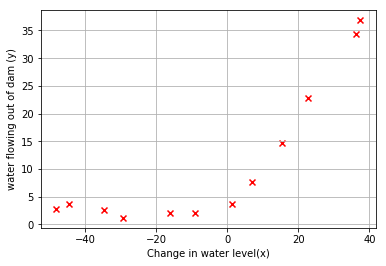

In [338]:
plt.scatter(x_train,y_train,c = 'r',marker='x')
plt.xlabel('Change in water level(x)')
plt.ylabel('water flowing out of dam (y)')
plt.grid()
plt.show()

In [339]:
def linearfunction(theta,x):
    return theta.T @x

In [340]:
theta =np.ones(X.shape[1])
theta

array([ 1.,  1.])

In [341]:
def linearRegCostFunction(theta,x,y,l=1):
    theta_reg = theta[1:]
    m = x.shape[0]
    #print(m,x.shape[1])
    regularized_term = l*np.power(theta_reg,2).sum()/2/m
    return np.power(x@theta-y,2).sum()/2/m+ regularized_term

In [342]:
linearRegCostFunction(theta,X,y_train)

303.99319222026429

In [343]:
def regularized_linear_gradient(theta,x,y,l=1):
    m= x.shape[0]
    g = x.T@(x@theta-y)/m
    regularized_term = theta.copy()
    regularized_term[0] = 0
    return g+regularized_term/m*l

In [344]:
regularized_linear_gradient(theta,X,y_train)

array([ -15.30301567,  598.25074417])

In [345]:
import scipy.optimize as opt

In [346]:
def trainLinearReg(theta, x,y,l=1):
    res = opt.minimize(fun=linearRegCostFunction,x0 = theta,
                       method = 'TNC',args=(x,y,l),jac = regularized_linear_gradient,
                      options = {'disp':True})
    return res

In [347]:
theta_trained = trainLinearReg(theta,X,y_train,l=0).x

In [348]:
theta_trained

array([ 13.08790362,   0.36777923])

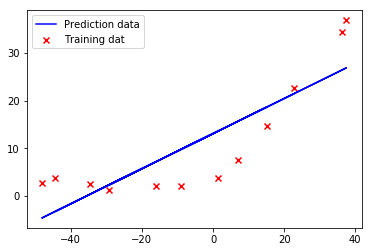

In [349]:
plt.scatter(X[:,1:], y_train,c = 'r',marker='x',label = 'Training dat')
plt.plot(X[:,1], X@theta_trained, 'b',label = 'Prediction data')
plt.legend(loc =2)
plt.show()

## plot learning curve

In [350]:
def learningCurve(theta,x,y,x_val,y_val):
    error_train = []
    error_val = []
    for i in range(1,13):
        theta_i = trainLinearReg(theta,x[:i],y[:i]).x
        error_train.append(linearRegCostFunction(theta_i,x[:i],y[:i],l =0))
        error_val.append( linearRegCostFunction(theta_i,x_val,y_val,l =0 ))
        
    return np.array(error_train),np.array(error_val)

In [351]:
X.shape, y_train.shape

((12, 2), (12,))

In [352]:
error_train,error_val = learningCurve(theta,X,y_train,Xval,y_val)

In [353]:
train_num = np.arange(1,13)

In [354]:
train_num

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

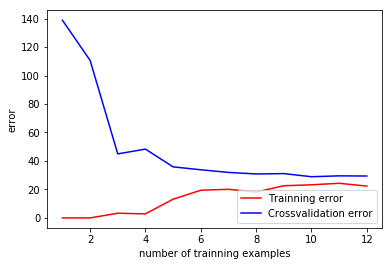

In [355]:
plt.plot(train_num,error_train,'r',label = 'Trainning error')
plt.plot(train_num,error_val,'b',label = 'Crossvalidation error')
plt.xlabel('number of trainning examples')
plt.ylabel('error')
plt.legend(loc = 4)
plt.show()

## feature scaling

In [356]:
np.mean(X,axis = 0)

array([ 1.        , -5.08542635])

In [357]:
def featureNormalize(df):
    return df.apply(lambda column: (column-column.mean())/column.std())

## 重新加载数据

In [358]:
X,y,Xval,yval,Xtest,ytest = load_data('ex5data1.mat')

In [359]:
X

array([-15.93675813, -29.15297922,  36.18954863,  37.49218733,
       -48.05882945,  -8.94145794,  15.30779289, -34.70626581,
         1.38915437, -44.38375985,   7.01350208,  22.76274892])

In [360]:
def polyData(x,power = 8):
    
    df = pd.DataFrame({'f{}'.format(i): np.power(x,i)for i in range(1,power+1)})
    return df

In [361]:
def prepare_data(*args,power= 8):
    def prepare(x,power = power):
        df = polyData(x)
        df_scaling = featureNormalize(df)
        ndarray = df_scaling.as_matrix()
        return np.insert(ndarray,0,np.ones(ndarray.shape[0]),axis =1)
    
    return [prepare(x) for x in args ]

In [362]:
polyData(X,power = 3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


In [363]:
prepare_data(X)

[array([[  1.00000000e+00,  -3.62140776e-01,  -7.55086688e-01,
           1.82225876e-01,  -7.06189908e-01,   3.06617917e-01,
          -5.90877673e-01,   3.44515797e-01,  -5.08481165e-01],
        [  1.00000000e+00,  -8.03204845e-01,   1.25825266e-03,
          -2.47936991e-01,  -3.27023420e-01,   9.33963187e-02,
          -4.35817606e-01,   2.55416116e-01,  -4.48912493e-01],
        [  1.00000000e+00,   1.37746700e+00,   5.84826715e-01,
           1.24976856e+00,   2.45311974e-01,   9.78359696e-01,
          -1.21556976e-02,   7.56568484e-01,  -1.70352114e-01],
        [  1.00000000e+00,   1.42093988e+00,   7.06646754e-01,
           1.35984559e+00,   3.95534038e-01,   1.10616178e+00,
           1.25637135e-01,   8.71929081e-01,  -5.96376930e-02],
        [  1.00000000e+00,  -1.43414853e+00,   1.85399982e+00,
          -2.03716308e+00,   2.33143133e+00,  -2.41153626e+00,
           2.60221195e+00,  -2.64567451e+00,   2.76608525e+00],
        [  1.00000000e+00,  -1.28687086e-01,  -9.7

## 训练线性回归模型

In [364]:
X_poly,Xval_poly,Xtest_poly = prepare_data(X,Xval,Xtest)

In [365]:
Xval_poly.shape

(21, 9)

In [366]:
yval.shape

(21,)

In [367]:
def poly_fitCurve(theta,X_poly,X,y):
    plt.scatter(X,y,c = 'r',marker= 'x')
    x= np.linspace(-60,60,1000)
    x_poly = prepare_data(x)
    #print(x_poly[0].shape)
    plt.plot(x,x_poly[0]@theta,'b-')
    plt.xlabel('Change in water level(x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.show()

In [368]:
def polynomial_train(X,X_poly,Xval_poly,y,yval,l=0):
    theta = np.ones(X_poly.shape[1])
    train_theta = trainLinearReg(theta,X_poly,y,l).x
    # 绘出拟合曲线
    poly_fitCurve(train_theta,X_poly, X,y)
    
    error_polytrain = []
    error_polyval =[]
    for i in range(1,X.shape[0]+1):
        train_thetai = trainLinearReg(theta,X_poly[:i],y[:i],l ).x
        error_polytrain.append(linearRegCostFunction(train_thetai,X_poly[:i],y[:i]))
        #print(error_polytrain)
        error_polyval.append(linearRegCostFunction(train_thetai,Xval_poly,yval))
    #print(error_polyval)
    sample_num = np.arange(1,13)
    plt.plot(sample_num,error_polytrain,'r',label = 'Train')
    plt.plot(sample_num,error_polyval,'b',label = 'Cross_validation')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend(loc = 2)
    plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(l))
    plt.show()
    
  

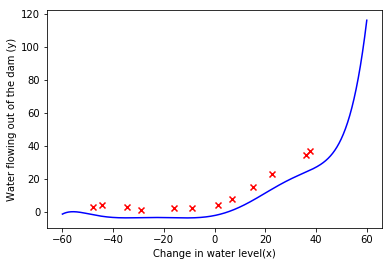

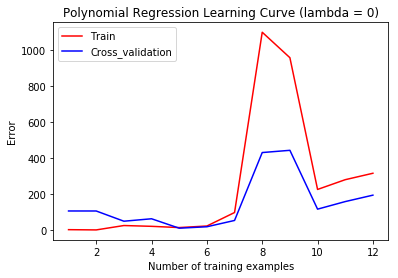

In [369]:
polynomial_train(X,X_poly,Xval_poly,y,yval)

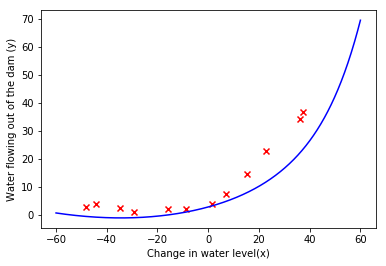

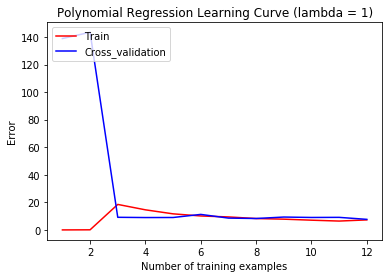

In [370]:
polynomial_train(X,X_poly,Xval_poly,y,yval,l=1)

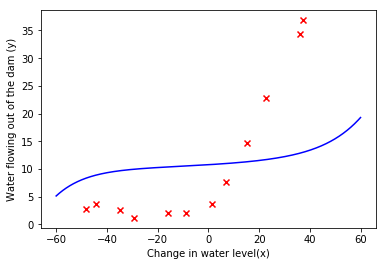

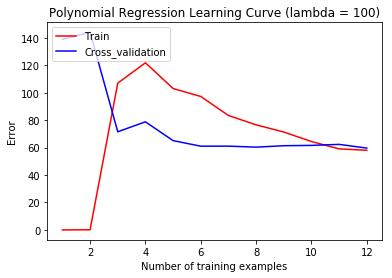

In [371]:
polynomial_train(X,X_poly,Xval_poly,y,yval,l=100)

In [372]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []
theta_l = np.ones(X_poly.shape[1])

In [373]:
X_poly.shape,y.shape,Xval_poly.shape,yval.shape

((12, 9), (12,), (21, 9), (21,))

In [374]:

for i in l_candidate:
    theta_l = np.ones(X_poly.shape[1])
    res = trainLinearReg(theta_l,X_poly,y,i)
    error_tr = linearRegCostFunction(res.x,X_poly,y,l =0)
    error_cv = linearRegCostFunction(res.x,Xval_poly,yval,l =0)
    
    training_cost.append(error_tr)
    cv_cost.append(error_cv)


In [375]:
len(cv_cost)

10

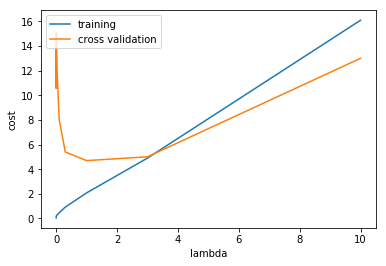

In [376]:
plt.plot(l_candidate, training_cost, label='training')
plt.plot(l_candidate, cv_cost, label='cross validation')
plt.legend(loc=2)

plt.xlabel('lambda')

plt.ylabel('cost')
plt.show()

In [377]:
y

array([  2.13431051,   1.17325668,  34.35910918,  36.83795516,
         2.80896507,   2.12107248,  14.71026831,   2.61418439,
         3.74017167,   3.73169131,   7.62765885,  22.7524283 ])

In [378]:
res.x

array([ 11.21758894,   4.36656761,   2.39947367,   2.90176749,
         1.50155105,   1.86591875,   0.89813758,   1.19375383,   0.50923142])

In [379]:
l_candidate[np.argmin(cv_cost)]

1